In [47]:
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np
import sklearn.cluster as sklc  # For clustering
import sklearn.metrics as sklm 
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sn
import scipy as sp

import scipy.stats as sps

In [3]:
data2015=pd.read_csv('2015.csv')
data2016=pd.read_csv('2016.csv')
data2017=pd.read_csv('2017.csv')
data2018=pd.read_csv('2018.csv')
data2019=pd.read_csv('2019.csv')

In [4]:
dataavg=pd.read_csv('avg rents by borough.csv')

In [5]:
data=[data2015,data2016,data2017,data2018,data2019]

In [27]:
count1=data2015[(data2015.calculated_host_listings_count==1)]
print(count1.shape)
count2=data2015[(data2015.calculated_host_listings_count>=2)&(data2015.calculated_host_listings_count<=5)]
print(count2.shape)
count3=data2015[(data2015.calculated_host_listings_count>6)&(data2015.calculated_host_listings_count<=10)]
print(count3.shape)
count4=data2015[(data2015.calculated_host_listings_count>10)&(data2015.calculated_host_listings_count<=100)]
print(count4.shape)
count5=data2015[(data2015.calculated_host_listings_count>100)]
print(count5.shape)
count2015=[len(count1),len(count2),len(count3),len(count4),len(count5)]
print(count2015)

(5031, 17)
(2431, 17)
(529, 17)
(1167, 17)
(25, 17)
[5031, 2431, 529, 1167, 25]


In [30]:
for i in data:
    count1=i[(i.calculated_host_listings_count==1)]
    print(count1.shape)
    count2=i[(i.calculated_host_listings_count>=2)&(i.calculated_host_listings_count<=5)]
    print(count2.shape)
    count3=i[(i.calculated_host_listings_count>6)&(i.calculated_host_listings_count<=10)]
    print(count3.shape)
    count4=i[(i.calculated_host_listings_count>10)&(i.calculated_host_listings_count<=100)]
    print(count4.shape)
    count5=i[(i.calculated_host_listings_count>100)]
    print(count5.shape)
    count=[len(count1),len(count2),len(count3),len(count4),len(count5)]
    print(count)


(5031, 17)
(2431, 17)
(529, 17)
(1167, 17)
(25, 17)
[5031, 2431, 529, 1167, 25]
(7783, 17)
(3647, 17)
(729, 17)
(2355, 17)
(323, 17)
[7783, 3647, 729, 2355, 323]
(8319, 17)
(3976, 17)
(872, 17)
(2573, 17)
(403, 17)
[8319, 3976, 872, 2573, 403]
(10332, 17)
(5619, 17)
(1476, 17)
(5134, 17)
(1441, 17)
[10332, 5619, 1476, 5134, 1441]
(10819, 17)
(6271, 17)
(1730, 17)
(6772, 17)
(1493, 17)
[10819, 6271, 1730, 6772, 1493]


In [57]:
a=[2015,2016,2017,2018,2019]
#b1=[5031, 2431, 529, 1167, 25]
#b2=[7783, 3647, 729, 2355, 323]
#b3=[8319, 3976, 872, 2573, 403]
#b4=[10332, 5619, 1476, 5134, 1441]
#b5=[10819, 6271, 1730, 6772, 1493]

b1=[5031,7783,8319,10332,10819]
b2=[2431,3647,3976,5619,6271]
b3=[529,729,872,1476,1730]
b4=[1167,2355,2573,5134,6772]
b5=[25,323,403,1441,1493]

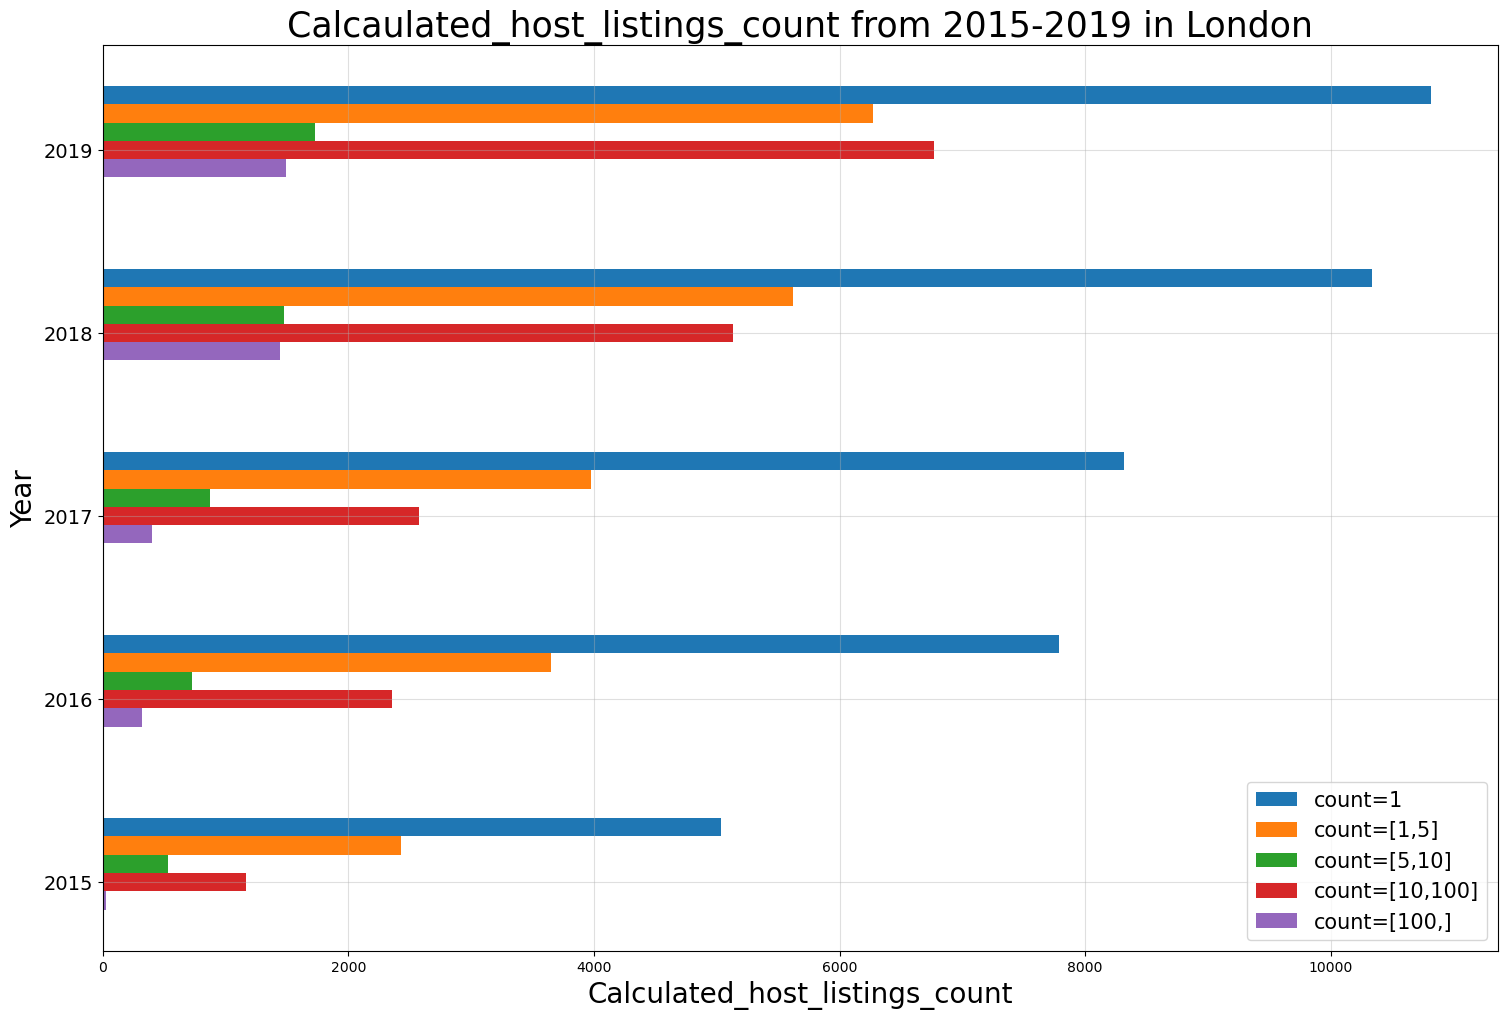

In [69]:
plt.figure(figsize=(18,12),dpi=100)
height=0.1
a1 = list(range(len(a)))
a2 = [i+height for i in a1]
a3 = [i+height*2 for i in a1]
a4 = [i+height*3 for i in a1]
a5 = [i+height*4 for i in a1]

plt.barh(a5,b1,height=height,label='count=1')
plt.barh(a4,b2,height=height,label='count=[1,5]')
plt.barh(a3,b3,height=height,label='count=[5,10]')
plt.barh(a2,b4,height=height,label='count=[10,100]')
plt.barh(range(len(a)),b5,height=height,label='count=[100,]')

plt.grid(alpha=0.4)

plt.yticks(a2,a,fontsize=14)

font={'size':15}
plt.legend(prop=font)

plt.xlabel('Calculated_host_listings_count',fontsize=20)
plt.ylabel('Year',fontsize=20)
plt.title('Calcaulated_host_listings_count from 2015-2019 in London',fontsize=25)
plt.show()

Text(0.5, 1.0, 'Trend calculated_host_listings_count in different years')

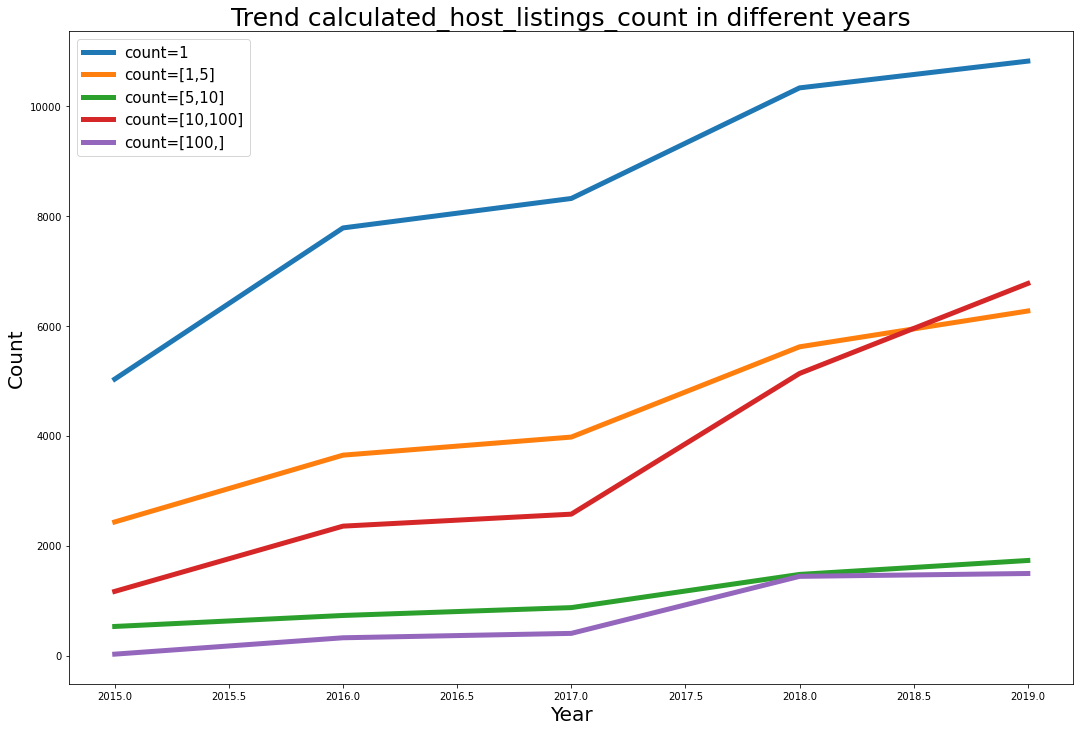

In [104]:
plt.figure(figsize=(18,12))
plt.plot(a,b1,label='count=1',linewidth=5)
plt.plot(a,b2,label='count=[1,5]',linewidth=5)
plt.plot(a,b3,label='count=[5,10]',linewidth=5)
plt.plot(a,b4,label='count=[10,100]',linewidth=5)
plt.plot(a,b5,label='count=[100,]',linewidth=5)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Count',fontsize=20)
font={'size':15}
plt.legend(prop=font)
plt.title('Trend calculated_host_listings_count in different years',fontsize=25)

In [ ]:
camden2015=data2015[data2015.neighbourhood=='Camden']
camden2015

In [176]:
camden2015=data2015[data2015.neighbourhood=='Camden']
c_o_l2015=data2015[data2015.neighbourhood=='City of London']
Isl2015=data2015[data2015.neighbourhood=='Islington']
K_a_C2015=data2015[data2015.neighbourhood=='Kensington and Chelsea']
West2015=data2015[data2015.neighbourhood=='Westminster']
borou=[camden2015,c_o_l2015,Isl2015,K_a_C2015,West2015]
df=[]
dfn=[]
for b in borou:
    borou1=b[(b.calculated_host_listings_count==1)]
    print(borou1.shape)
    borou2=b[(b.calculated_host_listings_count>=2)&(b.calculated_host_listings_count<=5)]
    print(borou2.shape)
    borou3=b[(b.calculated_host_listings_count>6)&(b.calculated_host_listings_count<=10)]
    print(borou3.shape)
    borou4=b[(b.calculated_host_listings_count>10)&(b.calculated_host_listings_count<=100)]
    print(borou4.shape)
    borou5=b[(b.calculated_host_listings_count>100)]
    print(borou5.shape)
    sum=b['calculated_host_listings_count']
    num2015=[len(borou1),len(borou2),len(borou3),len(borou4),len(borou5)]
    per2015=[len(borou1)/len(sum),len(borou2)/len(sum),len(borou3)/len(sum),len(borou4)/len(sum),len(borou5)/len(sum)]
    print(per2015)
    print()
    dfn.append(num2015)
    df.append(per2015)  

(932, 17)
(450, 17)
(102, 17)
(260, 17)
(17, 17)
[0.5247747747747747, 0.2533783783783784, 0.057432432432432436, 0.1463963963963964, 0.009572072072072071]

(83, 17)
(42, 17)
(20, 17)
(44, 17)
(2, 17)
[0.4256410256410256, 0.2153846153846154, 0.10256410256410256, 0.22564102564102564, 0.010256410256410256]

(1456, 17)
(472, 17)
(69, 17)
(84, 17)
(6, 17)
[0.6884160756501182, 0.22316784869976358, 0.032624113475177303, 0.03971631205673759, 0.0028368794326241137]

(1026, 17)
(578, 17)
(110, 17)
(235, 17)
(0, 17)
[0.515318935208438, 0.29030637870416875, 0.055248618784530384, 0.11803114013058764, 0.0]

(1534, 17)
(889, 17)
(228, 17)
(544, 17)
(0, 17)
[0.4721452754693752, 0.27362265312403816, 0.07017543859649122, 0.16743613419513698, 0.0]



In [177]:
print(df)

[[0.5247747747747747, 0.2533783783783784, 0.057432432432432436, 0.1463963963963964, 0.009572072072072071], [0.4256410256410256, 0.2153846153846154, 0.10256410256410256, 0.22564102564102564, 0.010256410256410256], [0.6884160756501182, 0.22316784869976358, 0.032624113475177303, 0.03971631205673759, 0.0028368794326241137], [0.515318935208438, 0.29030637870416875, 0.055248618784530384, 0.11803114013058764, 0.0], [0.4721452754693752, 0.27362265312403816, 0.07017543859649122, 0.16743613419513698, 0.0]]


In [181]:
df15=pd.DataFrame(df,index=['Camden','City of London','Islington','Kensington and Chelsea','Westminster'],
                 columns=pd.Index(['1','2-5','6-10','11-100','100,'],name ='borou vers count'))
df15

borou vers count,1,2-5,6-10,11-100,"100,"
Camden,0.524775,0.253378,0.057432,0.146396,0.009572
City of London,0.425641,0.215385,0.102564,0.225641,0.010256
Islington,0.688416,0.223168,0.032624,0.039716,0.002837
Kensington and Chelsea,0.515319,0.290306,0.055249,0.118031,0.000000
Westminster,0.472145,0.273623,0.070175,0.167436,0.000000


In [183]:
dfn15=pd.DataFrame(dfn,index=['Camden','City of London','Islington','Kensington and Chelsea','Westminster'],
                 columns=pd.Index(['1','2-5','6-10','11-100','100,'],name ='borou vers count'))
dfn15

borou vers count,1,2-5,6-10,11-100,"100,"
Camden,932,450,102,260,17
City of London,83,42,20,44,2
Islington,1456,472,69,84,6
Kensington and Chelsea,1026,578,110,235,0
Westminster,1534,889,228,544,0


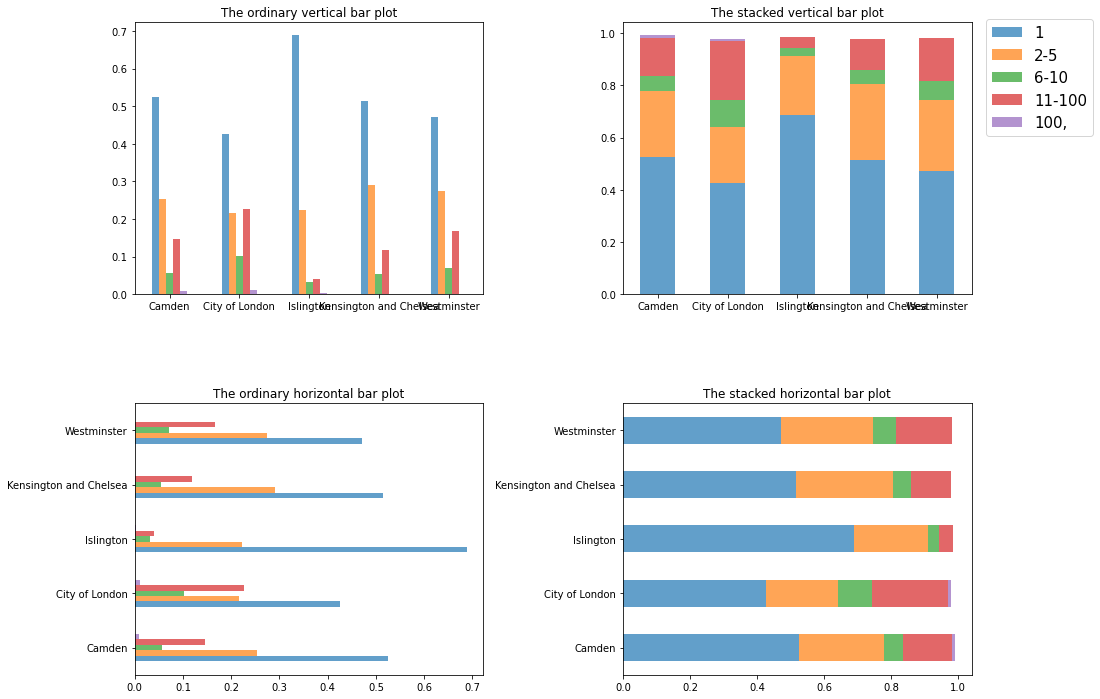

In [182]:
fig,axes = plt.subplots(2,2,figsize=(15,12))
df15.plot.bar(ax=axes[0,0],alpha=0.7,rot=0,legend=False)
df15.plot.bar(ax=axes[0,1],stacked=True,alpha=0.7,rot=0)

df15.plot.barh(ax=axes[1,0],alpha=0.7,rot=0,legend=False)
df15.plot.barh(ax=axes[1,1],stacked=True,alpha=0.7,rot=0,legend=False)

axes[0,0].set_title('The ordinary vertical bar plot')
axes[0,1].set_title('The stacked vertical bar plot')
axes[1,0].set_title('The ordinary horizontal bar plot')
axes[1,1].set_title('The stacked horizontal bar plot')
font={'size':15}
axes[0,1].legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = -0.2,prop=font)
fig.subplots_adjust(wspace=0.4,hspace=0.4)

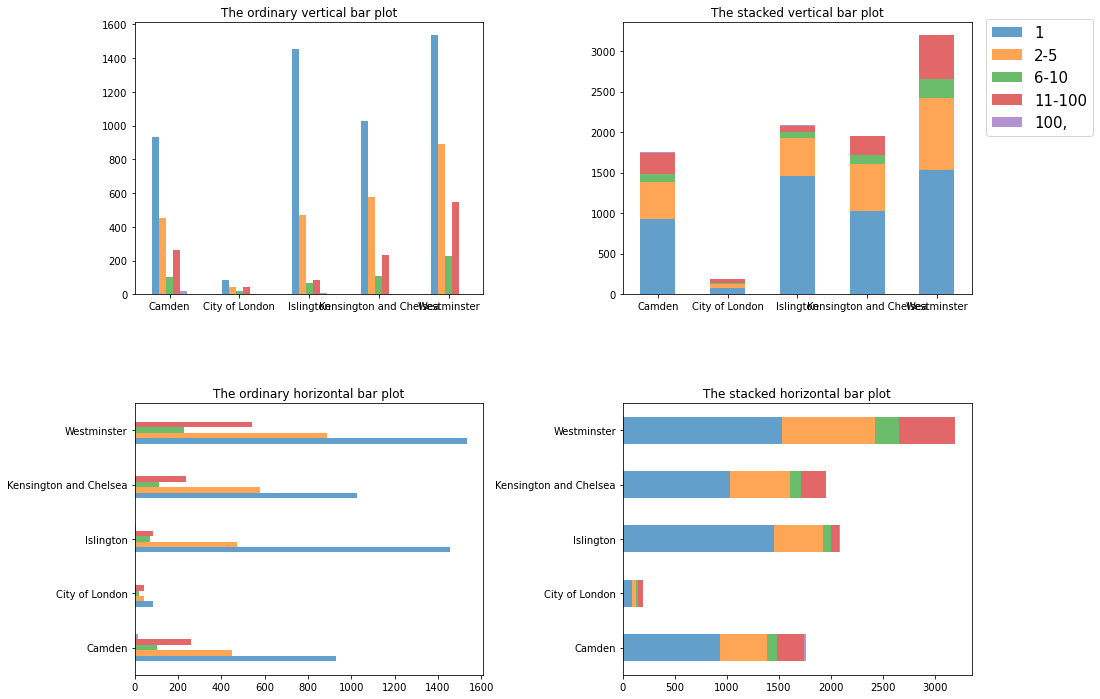

In [184]:
fig,axes = plt.subplots(2,2,figsize=(15,12))
dfn15.plot.bar(ax=axes[0,0],alpha=0.7,rot=0,legend=False)
dfn15.plot.bar(ax=axes[0,1],stacked=True,alpha=0.7,rot=0)

dfn15.plot.barh(ax=axes[1,0],alpha=0.7,rot=0,legend=False)
dfn15.plot.barh(ax=axes[1,1],stacked=True,alpha=0.7,rot=0,legend=False)

axes[0,0].set_title('The ordinary vertical bar plot')
axes[0,1].set_title('The stacked vertical bar plot')
axes[1,0].set_title('The ordinary horizontal bar plot')
axes[1,1].set_title('The stacked horizontal bar plot')
font={'size':15}
axes[0,1].legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = -0.2,prop=font)
fig.subplots_adjust(wspace=0.4,hspace=0.4)

In [198]:
df1=[]
for i in data:
    host1=i[(i.calculated_host_listings_count>10)&(i.neighbourhood=='Camden')]
    print(host1.shape)
    host2=i[(i.calculated_host_listings_count>10)&(i.neighbourhood=='City of London')]
    print(host2.shape)
    host3=i[(i.calculated_host_listings_count>10)&(i.neighbourhood=='Islington')]
    print(host3.shape)
    host4=i[(i.calculated_host_listings_count>10)&(i.neighbourhood=='Kensington and Chelsea')]
    print(host4.shape)
    host5=i[(i.calculated_host_listings_count>10)&(i.neighbourhood=='Westminster')]
    print(host5.shape)
    count=[len(host1),len(host2),len(host3),len(host4),len(host5)]
    print(count)
    print()
    df1.append(count)

(277, 17)
(46, 17)
(90, 17)
(235, 17)
(544, 17)
[277, 46, 90, 235, 544]

(568, 17)
(117, 17)
(281, 17)
(717, 17)
(995, 17)
[568, 117, 281, 717, 995]

(657, 17)
(128, 17)
(316, 17)
(727, 17)
(1148, 17)
[657, 128, 316, 727, 1148]

(1346, 17)
(206, 17)
(603, 17)
(1796, 17)
(2624, 17)
[1346, 206, 603, 1796, 2624]

(1602, 17)
(193, 17)
(664, 17)
(2252, 17)
(3554, 17)
[1602, 193, 664, 2252, 3554]



In [199]:
df1

[[277, 46, 90, 235, 544],
 [568, 117, 281, 717, 995],
 [657, 128, 316, 727, 1148],
 [1346, 206, 603, 1796, 2624],
 [1602, 193, 664, 2252, 3554]]

In [200]:
df1=pd.DataFrame(df1,index=['2015','2016','2017','2018','2019'],
                 columns=pd.Index(['Camden','City of London','Islington','Kensington and Chelsea','Westminster'],name ='host_count/year'))
df1

host_count/year,Camden,City of London,Islington,Kensington and Chelsea,Westminster
2015,277,46,90,235,544
2016,568,117,281,717,995
2017,657,128,316,727,1148
2018,1346,206,603,1796,2624
2019,1602,193,664,2252,3554


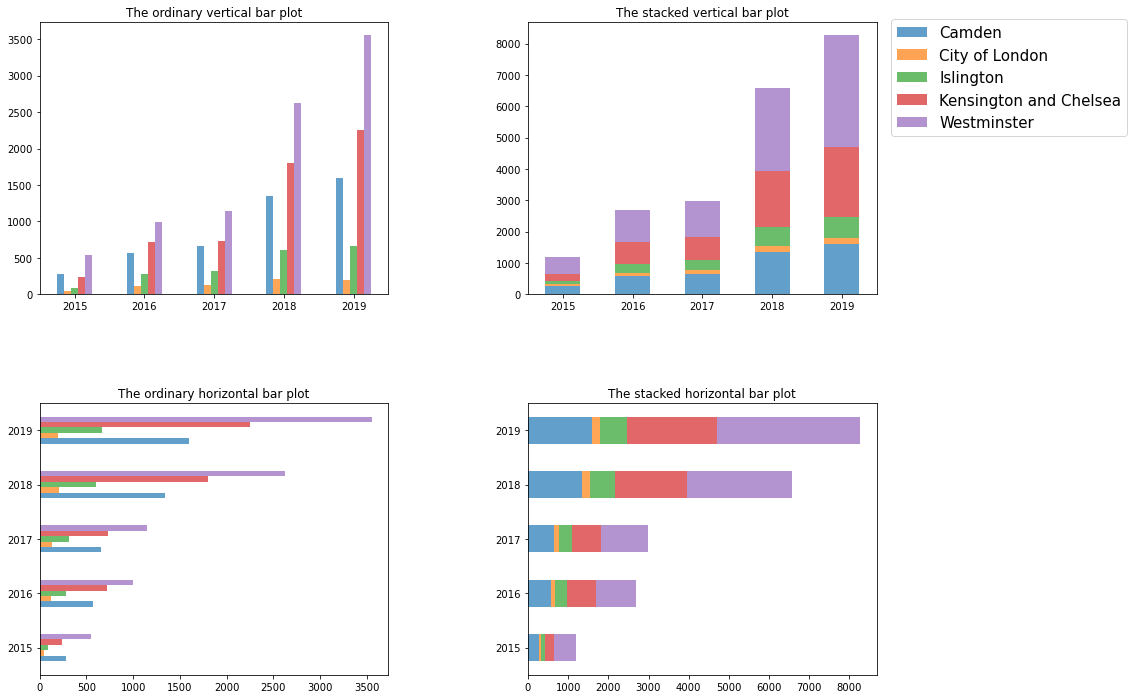

In [201]:
fig,axes = plt.subplots(2,2,figsize=(15,12))
df1.plot.bar(ax=axes[0,0],alpha=0.7,rot=0,legend=False)
df1.plot.bar(ax=axes[0,1],stacked=True,alpha=0.7,rot=0)

df1.plot.barh(ax=axes[1,0],alpha=0.7,rot=0,legend=False)
df1.plot.barh(ax=axes[1,1],stacked=True,alpha=0.7,rot=0,legend=False)

axes[0,0].set_title('The ordinary vertical bar plot')
axes[0,1].set_title('The stacked vertical bar plot')
axes[1,0].set_title('The ordinary horizontal bar plot')
axes[1,1].set_title('The stacked horizontal bar plot')
font={'size':15}
axes[0,1].legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = -0.2,prop=font)
fig.subplots_adjust(wspace=0.4,hspace=0.4)